In [63]:
# Imports
import pandas as pd
import numpy as np
import json as json
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt


In [64]:
 # Loading the data from CSV into panadas dataframe
tempIncomeStatement = pd.read_csv (r'../data/income_statement.csv', sep=',')
tempCashFlow = pd.read_csv (r'../data/cash_flow.csv', sep=',')
tempBalanceSheet = pd.read_csv (r'../data/balance-sheet.csv', sep=',')
tempEarnings = pd.read_csv (r'../data/EARNINGS.csv', sep=',')

tempMonthly = pd.read_csv (r'../data/monthly-data.csv', sep=',')
TickerSymbols = pd.read_csv (r'../data/nasdaq_screener_sorted_values.csv', sep=',')

In [65]:
# Printing Income statement
print(tempIncomeStatement)
print(tempIncomeStatement.columns)

# Printing Cash Flow
print(tempCashFlow.shape)
print(tempCashFlow.columns)

# Printing Balance Sheet
print(tempBalanceSheet.shape)
print(tempBalanceSheet.columns)

# Printing Earnings
print(tempEarnings.shape)
print(tempEarnings.columns)

     fiscalDateEnding reportedCurrency  grossProfit  totalRevenue  \
0          2021-09-30              USD  35174000000   82688000000   
1          2021-06-30              USD  35255000000   80769000000   
2          2021-03-31              USD  38079000000   88914000000   
3          2020-12-31              USD  44328000000  110801000000   
4          2020-09-30              USD  24689000000   64698000000   
...               ...              ...          ...           ...   
3899       2017-05-31              USD    345500000     572700000   
3900       2017-02-28              USD    325900000     566400000   
3901       2016-11-30              USD    356900000     623700000   
3902       2016-08-31              USD    326900000     597300000   
3903       2016-05-31              USD    248800000     710500000   

     costOfRevenue costofGoodsAndServicesSold operatingIncome  \
0      53802000000                48186000000     23786000000   
1      51591000000                4617900

In [66]:
# renaming Balance sheet column "fiscalDateEnding" to "timestamp" to match column name on both dataframes
tempIncomeStatement = tempIncomeStatement.rename(columns={"fiscalDateEnding": "timestamp"})
tempCashFlow = tempCashFlow.rename(columns={"fiscalDateEnding": "timestamp"})
tempBalanceSheet = tempBalanceSheet.rename(columns={"fiscalDateEnding": "timestamp"})
tempEarnings = tempEarnings.rename(columns={"fiscalDateEnding": "timestamp"})

# Merging all 4 frames into one

# Daily dates does not overlap on both dataframes, CompanyMonthly has the last trading day (not including weekends)
# While CompanyBalanaceSheet always has the last day of the month (including weekends)
# We need to cut out the daily date for both dataframes["timestamp"], to be able to merge them properly.
# Slicing the timestamp in CompanyMonthly, removing the days
sliceMonthly = tempMonthly["timestamp"].str.slice(0, -3)
tempMonthly["timestamp"] = sliceMonthly

# Printing
print("Monthly Data:")
print(tempMonthly["timestamp"])

# Slicing the timestamp in Income Statement, removing the days
sliceIncomestatement = tempIncomeStatement["timestamp"].str.slice(0, -3)
# For some reason i needed to use Iloc here, don't know why... 
tempIncomeStatement["timestamp"] = sliceIncomestatement

# Slicing the timestamp in Cash Flow, removing the days
sliceCashFlow = tempCashFlow["timestamp"].str.slice(0, -3)
# For some reason i needed to use Iloc here, don't know why... 
tempCashFlow["timestamp"] = sliceCashFlow

# Slicing the timestamp in CompanyBalanceSheet, removing the days
sliceBalanceSheet = tempBalanceSheet["timestamp"].str.slice(0, -3)
# For some reason i needed to use Iloc here, don't know why... 
tempBalanceSheet["timestamp"] = sliceBalanceSheet

# Slicing the timestamp in Earnings, removing the days
sliceEarnings = tempEarnings["timestamp"].str.slice(0, -3)
# For some reason i needed to use Iloc here, don't know why... 
tempEarnings["timestamp"] = sliceEarnings

# Printing
print("Income Statement:")
print(tempIncomeStatement["timestamp"])
print("Cash Flow:")
print(tempCashFlow["timestamp"])
print("Balance Sheet:")
print(tempBalanceSheet["timestamp"])
print("Earnings:")
print(tempEarnings["timestamp"])
print("Ticker Symbols:")
print(TickerSymbols["Symbol"])
    

Monthly Data:
0        2021-11
1        2021-10
2        2021-09
3        2021-08
4        2021-07
          ...   
43662    2000-11
43663    2000-10
43664    2000-09
43665    2000-08
43666    2000-07
Name: timestamp, Length: 43667, dtype: object
Income Statement:
0       2021-09
1       2021-06
2       2021-03
3       2020-12
4       2020-09
         ...   
3899    2017-05
3900    2017-02
3901    2016-11
3902    2016-08
3903    2016-05
Name: timestamp, Length: 3904, dtype: object
Cash Flow:
0       2021-09
1       2021-06
2       2021-03
3       2020-12
4       2020-09
         ...   
3880    2017-05
3881    2017-02
3882    2016-11
3883    2016-08
3884    2016-05
Name: timestamp, Length: 3885, dtype: object
Balance Sheet:
0       2021-09
1       2021-06
2       2021-03
3       2020-12
4       2020-09
         ...   
3852    2017-05
3853    2017-02
3854    2016-11
3855    2016-08
3856    2016-05
Name: timestamp, Length: 3857, dtype: object
Earnings:
0        2021-09
1        2021-06
2 

In [67]:
# for each company we want to make adjustments needed for each companys features and then we will merge them into one df

#------------ add error if ticker symbol is not in TickerSymbols["Symbol"] or size < 200


TickerSymbols = TickerSymbols[~TickerSymbols['Symbol'].isin(['RIVN'])]
final_df = pd.DataFrame()
counter = 0

for tickerSymbol in TickerSymbols["Symbol"]:
    counter = counter +1
    #print("this is the beginning of the forloop, tickersymbol: " + tickerSymbol + "counter = " + str(counter))
    
    # filter all dataframes for each ticketsymbol (stock)
    CompanyIncomeStatement = tempIncomeStatement.loc[tempIncomeStatement["symbol"] == tickerSymbol]
    CompanyCashFlow = tempCashFlow.loc[tempCashFlow["symbol"] == tickerSymbol]
    CompanyBalanceSheet = tempBalanceSheet.loc[tempBalanceSheet["symbol"] == tickerSymbol]
    CompanyEarnings = tempEarnings.loc[tempEarnings["symbol"] == tickerSymbol]
    CompanyMonthly = tempMonthly.loc[tempMonthly["Symbol"] == tickerSymbol]
    
    # Removing symbol for all Company dataframes
    CompanyIncomeStatement.drop(["reportedCurrency", 'symbol'], axis=1, inplace=True)
    CompanyCashFlow.drop(["reportedCurrency", 'symbol'], axis=1, inplace=True)
    CompanyBalanceSheet.drop(["reportedCurrency", 'symbol'], axis=1, inplace=True)
    CompanyEarnings.drop(['symbol', 'reportedDate'], axis=1, inplace=True)
    CompanyMonthly.drop(['Symbol'], axis=1, inplace=True)
    
    # Cutting out unecessary data from the CompanyMonthly
    # We only need price data in CompanyMonthly within the daterange of the 20 rows on CompanyBalanceSheet data
    # every row is 3 months in CompanyBalanceSheet. Every row in CompanyMonthly is 1 month, 3x20 = 60.
    idx = (CompanyMonthly.index[0]+60)
    CompanyMonthly = CompanyMonthly.loc[:idx]

    # calculating 1 month labels
    CompanyMonthly["1m"] = CompanyMonthly["close"].pct_change(periods = -1).shift(periods = 1)
    #print(CompanyMonthly.head(21))
    
    # merge all df into a temp df
    temp_df = pd.merge(CompanyIncomeStatement, CompanyCashFlow, how="outer", on = "timestamp")
    temp_df = pd.merge(temp_df, CompanyBalanceSheet, how="outer", on = "timestamp")
    temp_df = pd.merge(temp_df, CompanyEarnings, how="outer", on = "timestamp")
    #print(temp_df)
    
    # merging the rows from balance sheet and monthly on timestamp.
    merged_df = pd.merge(temp_df, CompanyMonthly, how="outer", on = "timestamp")
    
    # removing the rows over 20
    merged_df = merged_df.loc[:19]

    # calculate how much the increase is in percentage, interval of 3 months
    # also offsetting by 1, to get the labels on the correct row.
    cat = ["timestamp", "symbol", "close", "change"]
    merged_df["3m"] = merged_df["close"].pct_change(periods = -1).shift(periods = 1)
    
    # Removing the first row, because we do not have a label for it, 3 months have not passed yet for us to get the end price of the 3 month cycle
    #merged_df.drop(index=merged_df.index[0], axis=0, inplace=True)

    # Also dropping columns that we do not need, symbol, Symbol, open, high, low, close, volume etc.
    merged_df.drop(['open','high','low','volume', "close"], axis=1, inplace=True)

    # replacing all "None" strings with NaN data type
    merged_df = merged_df.replace('None', np.nan)

    # Checking for "None" Strings
    sub_df = merged_df.loc[: , (merged_df == 'None').any()]
    #print(sub_df)
    
    for col in merged_df.columns:
        if col != "timestamp":
            merged_df[col] = merged_df[col].astype("float")
            merged_df[col] = merged_df[col].replace(np.nan, merged_df[col].mean())
    
    # adding it to the final dataframe
    final_df = pd.concat([final_df, merged_df], axis=0)

C:\Users\Asus\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [68]:
print(final_df)
print(final_df.columns)
print(final_df.dtypes)
cat = ["1m", "3m"]
print(final_df[cat].head(20))


   timestamp   grossProfit  totalRevenue  costOfRevenue  \
0    2021-09  3.517400e+10  8.268800e+10   5.380200e+10   
1    2021-06  3.525500e+10  8.076900e+10   5.159100e+10   
2    2021-03  3.807900e+10  8.891400e+10   5.681900e+10   
3    2020-12  4.432800e+10  1.108010e+11   7.274200e+10   
4    2020-09  2.468900e+10  6.469800e+10   4.494500e+10   
..       ...           ...           ...            ...   
15   2017-08  3.652000e+08  6.048000e+08   2.396000e+08   
16   2017-05  3.455000e+08  5.727000e+08   2.272000e+08   
17   2017-02  3.259000e+08  5.664000e+08   2.404000e+08   
18   2016-11  3.569000e+08  6.237000e+08   2.668000e+08   
19   2016-08  3.269000e+08  5.973000e+08   2.704000e+08   

    costofGoodsAndServicesSold  operatingIncome  \
0                 4.818600e+10     2.378600e+10   
1                 4.617900e+10     2.412600e+10   
2                 5.150500e+10     2.750300e+10   
3                 6.711100e+10     3.353400e+10   
4                 4.000900e+10     1

In [69]:
print(final_df["1m"].isna().sum())
print(final_df["3m"].isna().sum())

0
0


In [70]:
# deleting columns with more than 1 % nan values
m = len(final_df)
for col in merged_df.columns:
    percentageNan = ((final_df[col].isnull().sum()/m)*100)
    print(str(col) + " has " + str(percentageNan))
    
    if ((final_df[col].isnull().sum()/m)*100) >= 0.1:
        final_df.drop(col, axis=1, inplace=True)
        print(str(col) + " has been dropped.")


timestamp has 0.0
grossProfit has 0.0
totalRevenue has 0.0
costOfRevenue has 0.0
costofGoodsAndServicesSold has 0.5047955577990914
costofGoodsAndServicesSold has been dropped.
operatingIncome has 0.0
sellingGeneralAndAdministrative has 0.0
researchAndDevelopment has 28.77334679454821
researchAndDevelopment has been dropped.
operatingExpenses has 0.0
investmentIncomeNet has 67.28924785461888
investmentIncomeNet has been dropped.
netInterestIncome has 4.467440686521958
netInterestIncome has been dropped.
interestIncome has 2.9530540131246843
interestIncome has been dropped.
interestExpense has 1.8929833417465927
interestExpense has been dropped.
nonInterestIncome has 27.435638566380614
nonInterestIncome has been dropped.
otherNonOperatingIncome has 18.021201413427562
otherNonOperatingIncome has been dropped.
depreciation has 71.90812720848056
depreciation has been dropped.
depreciationAndAmortization has 2.0191822311963654
depreciationAndAmortization has been dropped.
incomeBeforeTax has

In [75]:
final_df.isnull().sum()
final_df.shape

(3962, 35)

C:\Users\Asus\AppData\Local\Temp/ipykernel_12424/2420456720.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  final_df.var()


grossProfit                              1.874419e+22
totalRevenue                             3.032747e+23
costOfRevenue                            2.443574e+24
operatingIncome                          2.830986e+21
sellingGeneralAndAdministrative          6.746317e+21
operatingExpenses                        1.042477e+22
incomeBeforeTax                          3.741239e+21
incomeTaxExpense                         2.750104e+20
netIncomeFromContinuingOperations        4.231066e+21
ebit                                     4.100751e+21
netIncome_x                              2.434119e+21
operatingCashflow                        8.725630e+22
depreciationDepletionAndAmortization     1.249452e+21
cashflowFromInvestment                   2.952862e+22
cashflowFromFinancing                    1.234334e+24
netIncome_y                              2.690726e+21
totalAssets                              4.236942e+26
totalCurrentAssets                       1.787435e+26
cashAndCashEquivalentsAtCarr

1m                                       1.000000
3m                                       0.458345
cashflowFromInvestment                   0.008050
cashflowFromFinancing                    0.000438
shortTermDebt                           -0.000274
retainedEarnings                        -0.001260
operatingCashflow                       -0.002117
otherNonCurrrentAssets                  -0.004505
costOfRevenue                           -0.005610
operatingExpenses                       -0.007824
netIncomeFromContinuingOperations       -0.009323
totalCurrentAssets                      -0.012197
ebit                                    -0.012694
operatingIncome                         -0.012860
commonStock                             -0.013299
netIncome_x                             -0.013954
otherCurrentLiabilities                 -0.014058
sellingGeneralAndAdministrative         -0.014314
totalLiabilities                        -0.014807
totalAssets                             -0.015755


<AxesSubplot:>

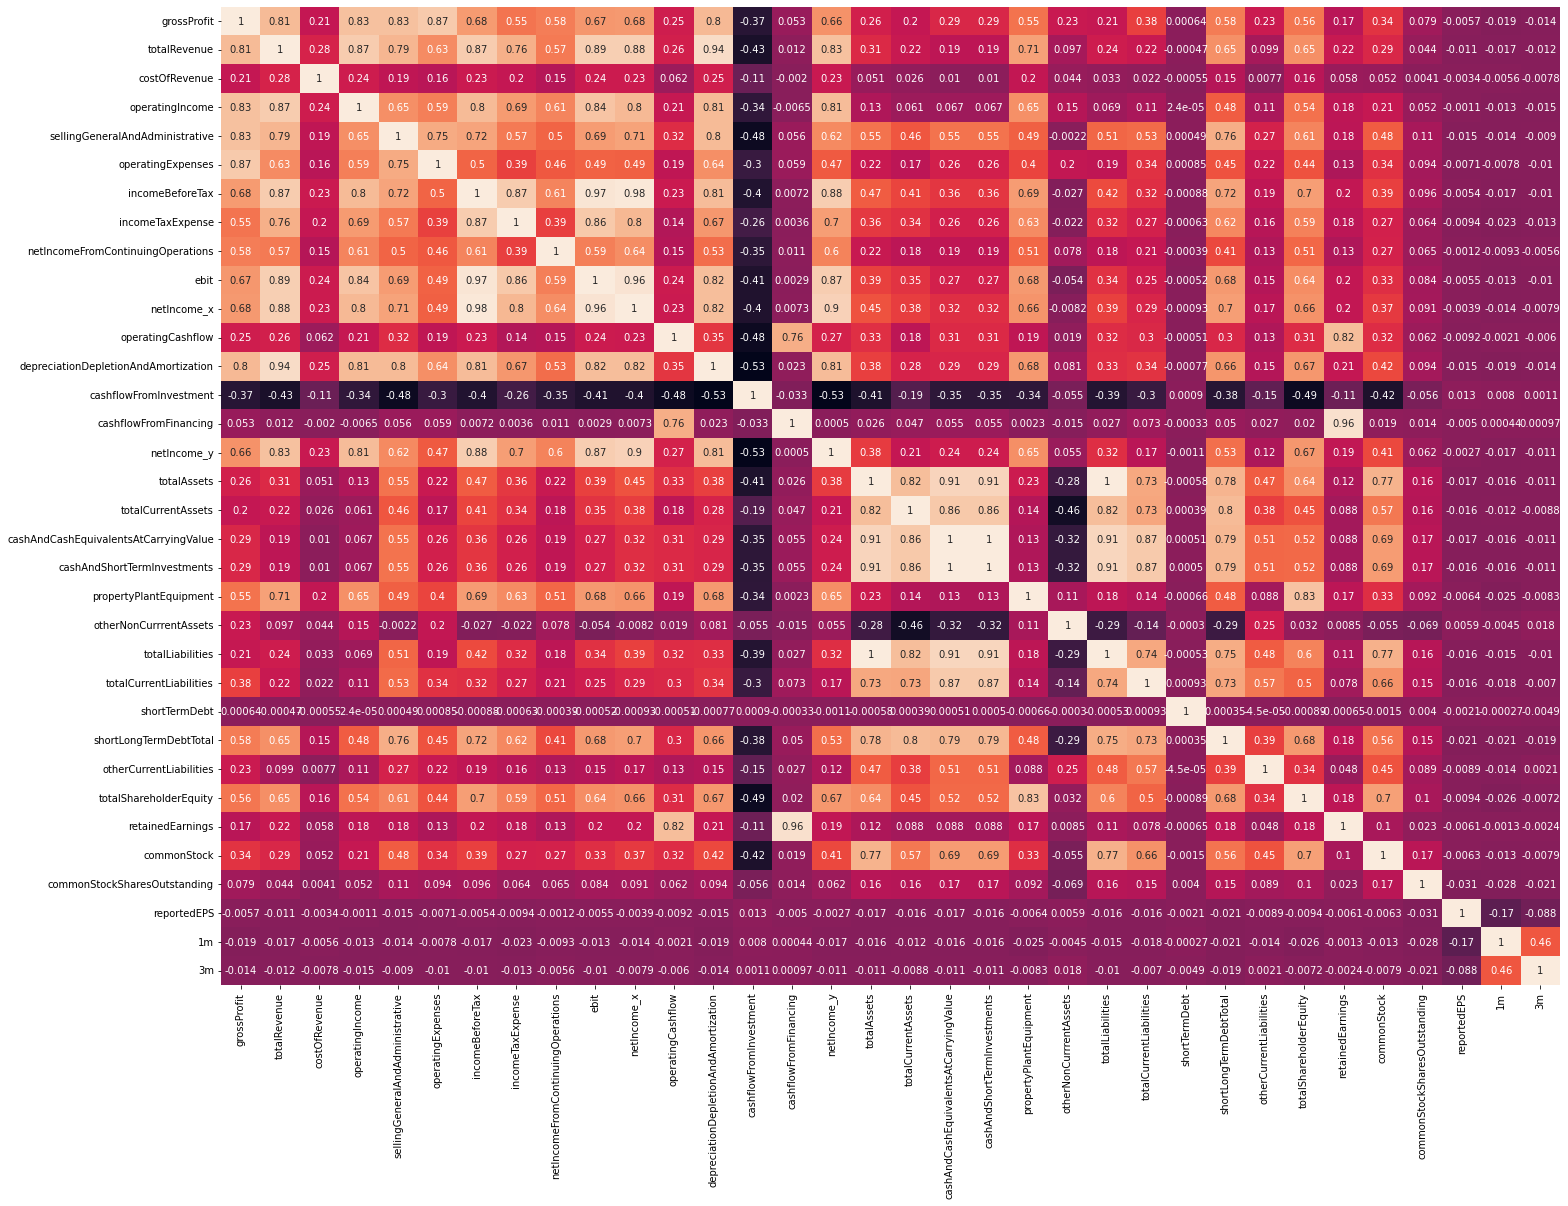

In [74]:
# correlation calculation
feature_corr = final_df.copy().corr()

# sorting and using 1m
sortedDesc = feature_corr["1m"].sort_values(ascending=False) 
print(sortedDesc.head(50))

#cf_matrix = confusion_matrix(feature_corr)
plt.figure(figsize = (24,18))
sns.heatmap(feature_corr, annot=True, cbar=False, )

3m                                       1.000000
1m                                       0.458345
otherNonCurrrentAssets                   0.017806
otherCurrentLiabilities                  0.002095
cashflowFromInvestment                   0.001103
cashflowFromFinancing                    0.000974
retainedEarnings                        -0.002392
shortTermDebt                           -0.004914
netIncomeFromContinuingOperations       -0.005585
operatingCashflow                       -0.005987
totalCurrentLiabilities                 -0.007015
totalShareholderEquity                  -0.007212
costOfRevenue                           -0.007813
commonStock                             -0.007902
netIncome_x                             -0.007905
propertyPlantEquipment                  -0.008276
totalCurrentAssets                      -0.008832
sellingGeneralAndAdministrative         -0.009031
totalLiabilities                        -0.010019
incomeBeforeTax                         -0.010138


<AxesSubplot:>

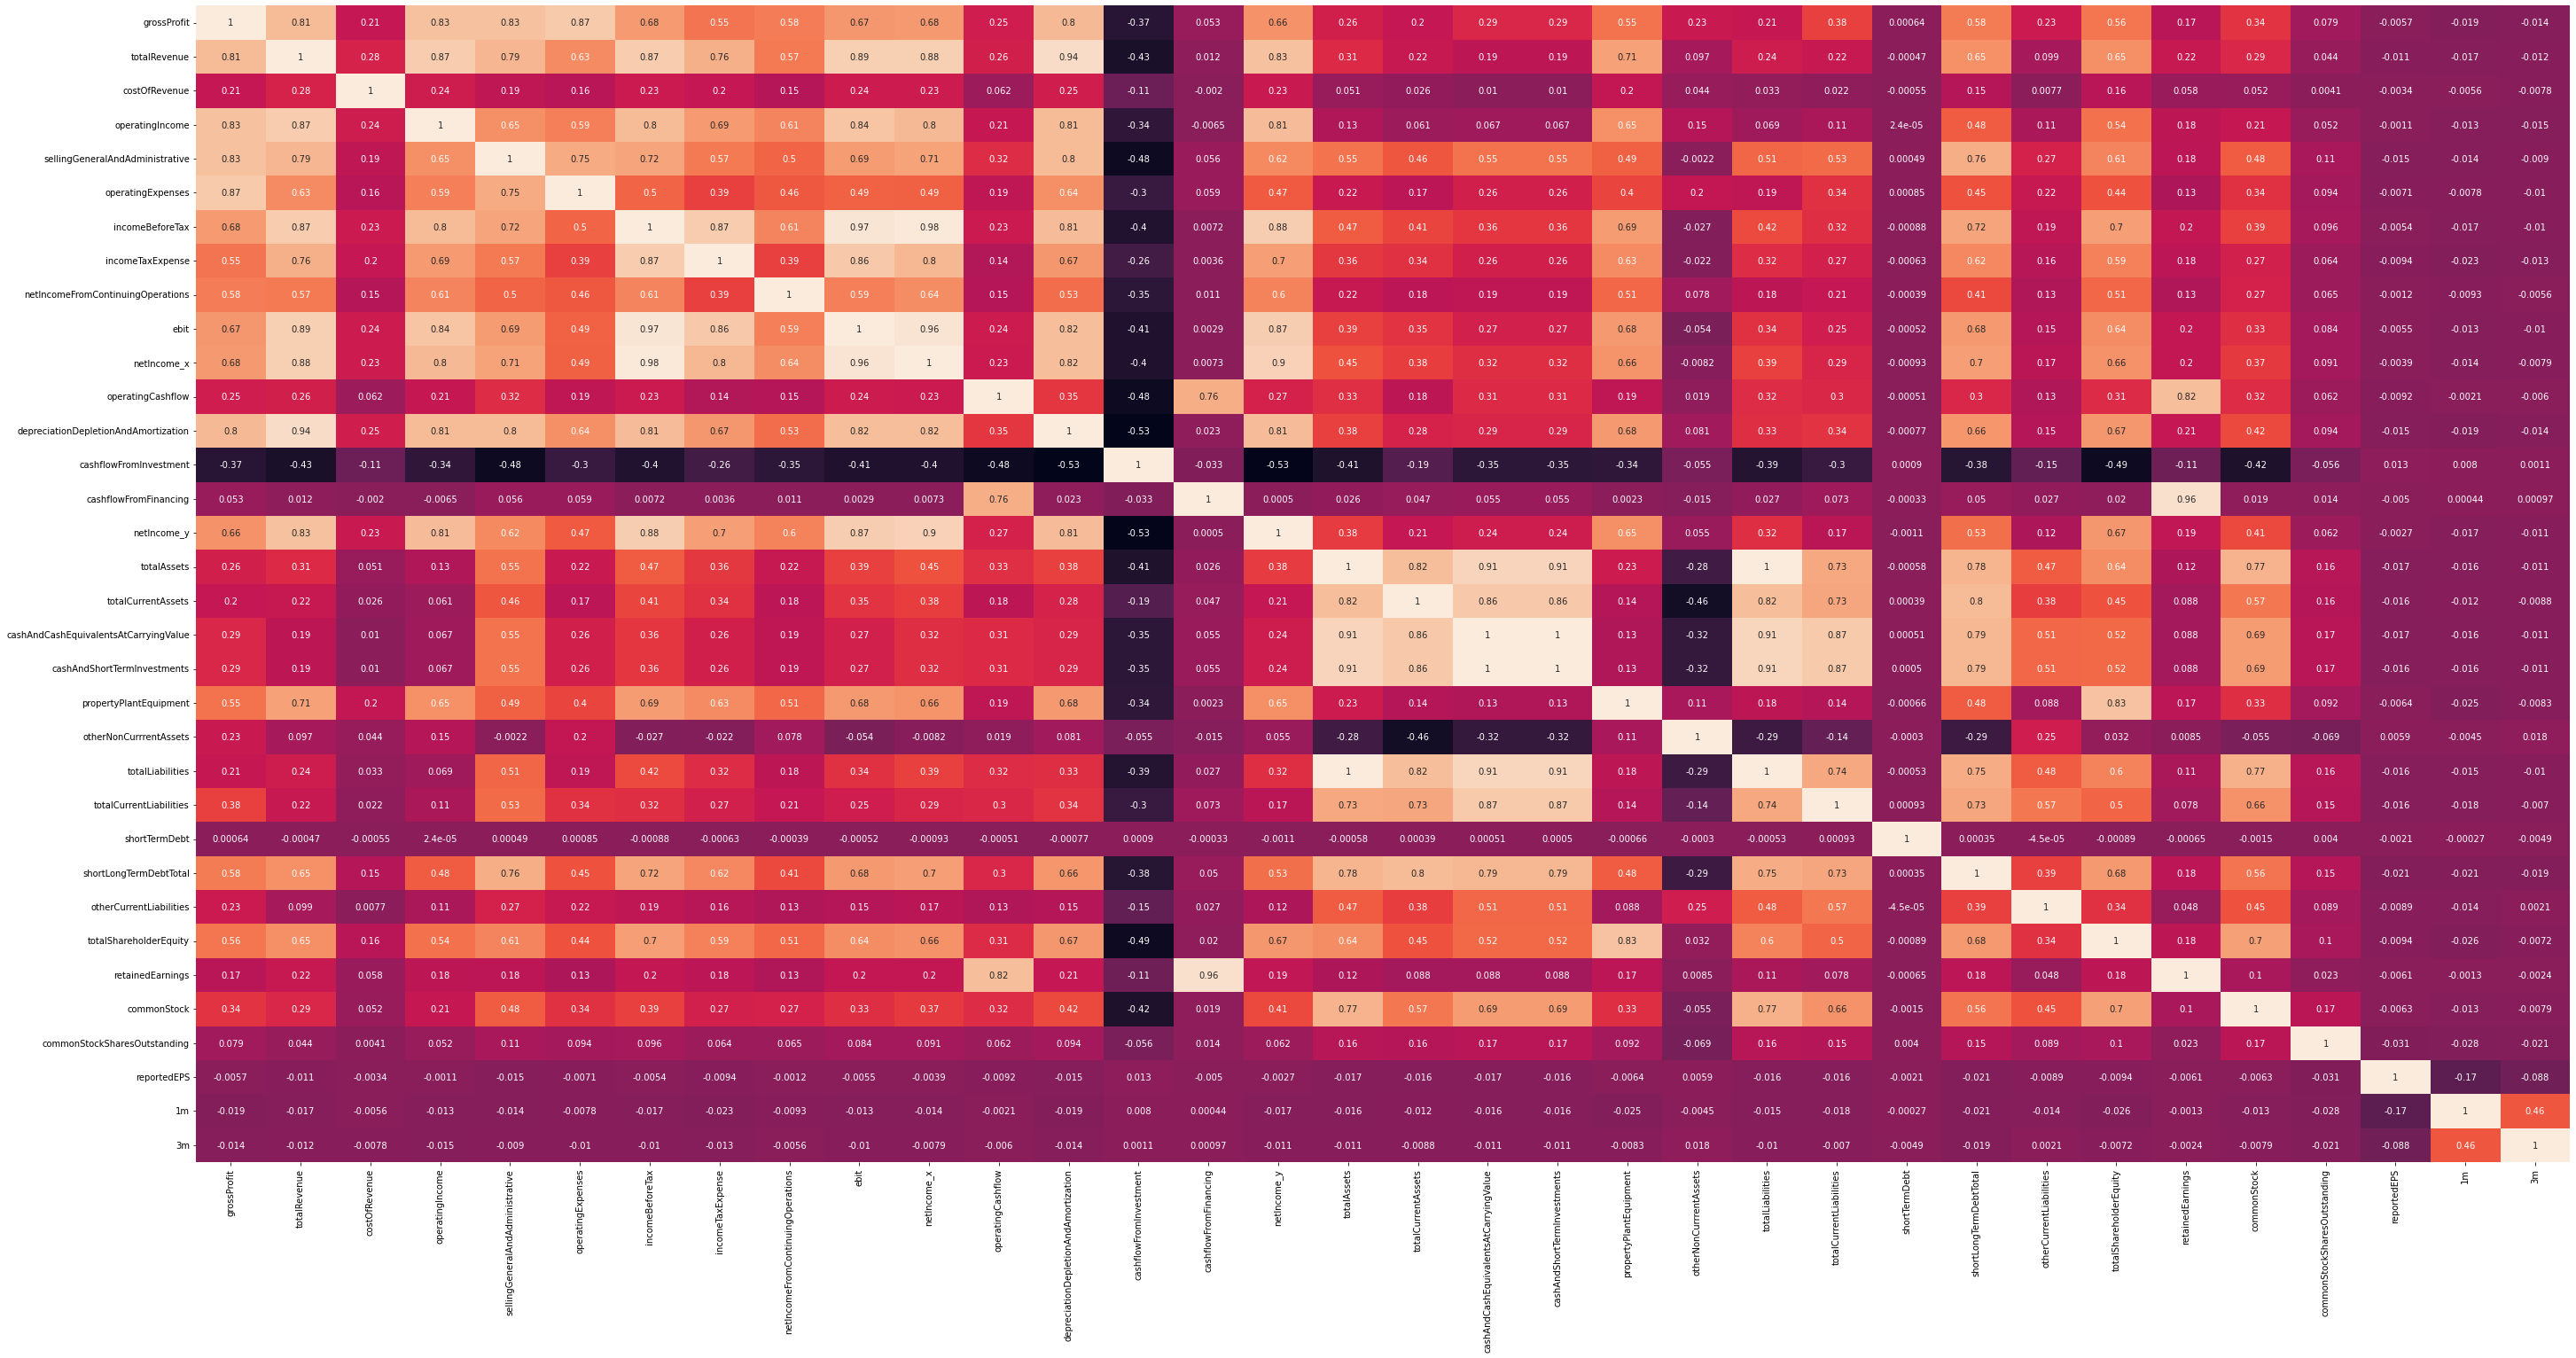

In [73]:
# sorting and using 3m
sortedDesc = feature_corr["3m"].sort_values(ascending=False) 
print(sortedDesc.head(50))

#cf_matrix = confusion_matrix(feature_corr)
plt.figure(figsize = (48,24))
sns.heatmap(feature_corr, annot=True, cbar=False, )